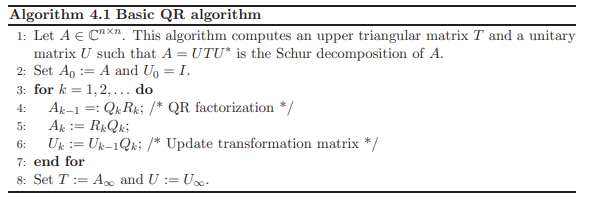

In [1]:
import random
from linalg.vector import norm
from linalg.matrix import qr_decomposition, normalize, multiple_matrix, transpose, add_matrix

In [2]:
A = [[3, 2, -3], [5, 0, 4], [0, -1, 3]]

In [3]:
def eye(n, mul=1):
    I = [[0 for i in range(n)] for i in range(n)]
    for i in range(n):
        for j in range(n):
            if i == j:
                I[i][j] = 1 * mul
    return I

In [4]:
def eigenvalues(A, iterations=10000, tol=1e-4):
    import copy
    Ak = copy.deepcopy(A)
    n = len(A)
    
    Uk = eye(n)
    for k in range(iterations):
        Qk, Rk = qr_decomposition(Ak)
        Ak = multiple_matrix(Rk, Qk)
        Ukafter = multiple_matrix(Uk, Qk)
        
        diff = 0
        for urow, uarow in zip(Uk, Ukafter):
            diff_row = sum([abs(u-ua) for u, ua in zip(urow, uarow)])
            diff += diff_row
            
        if diff < tol:
            break
            
        Uk = Ukafter
    
    return [Ak[i][i] for i in range(n)]

In [5]:
eigenvalues(A)

[5.331810310203132, 1.1552404121496964, -0.48705072235382607]

In [6]:
import numpy as np
np.linalg.eig(A)

(array([ 5.33181031, -0.48705072,  1.15524041]),
 array([[ 0.79156677, -0.29972355, -0.17536491],
        [ 0.56161668,  0.91706148,  0.86551759],
        [-0.24085007,  0.26299058,  0.46917636]]))